# Tutorial 1 : Run a first scenario

## -1 - Prerequisites

In order to run this example, you'll need to:

* use python 3.7 +
* install requierements from the requirements.txt file
* install this package https://test.pypi.org/project/pkg-test-distributed-learning-contributivity/0.0.18/



In [3]:
import sys
import subprocess

requirements = ['librosa==0.8.0',
 'Keras==2.3.1',
 'matplotlib==3.1.3',
 'numpy==1.19.0',
 'scipy==1.4.1',
 'scikit-learn==0.22.1',
 'pandas==1.0.5',
 'seaborn==0.10.0',
 'loguru==0.4.1',
 'tensorflow==2.2.0',
 'ruamel.yaml==0.16.10']

def pip_install(package_name):
    subprocess.call(
        [sys.executable, '-m', 'pip', 'install', package_name]
    )


for package in requirements:
    pip_install(package)


!pip install -i https://test.pypi.org/simple/ subtest==0.0.0.18


Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 61kB 3.0MB/s 


## 0 - Context 

In collaborative data science projects partners sometimes need to train a model on multiple datasets, contributed by different data providing partners. In such cases the partners might have to measure how much each dataset involved contributed to the performance of the model. This is useful for example as a basis to agree on how to share the reward of the ML challenge or the future revenues derived from the predictive model, or to detect possible corrupted datasets or partners not playing by the rules. The library explores this question and the opportunity to implement some mechanisms helping partners in such scenarios to measure each dataset's *contributivity* (as *contribution to the performance of the model*).

In this tutorial, you will learn how to design your own first scenario, run it, and explore few results. 

## 1 - Creating your first scenario 

### The scenario object

A scenario mocks a collaborative ML project, where a public dataset is artificially pratitioned in a number of individual datasets. A model will be trained with distributed learning techniques, and different contributivity measurement approaches can be tested.

### Create a custom scenario handling mandatory parameters

The two mandatory parameters we are interested in are `partner_count` and `amounts_per_partner`. 
These parameters describe how many partners will be created and how much proportion they will have in the dataset.
Here we choose 3 partners, with respectively 20 %, 50% and 30% of the dataset. 

We can use more advanced sample split options in order to fine tune the data distribution between partners, but it will be the topic of incoming tutorials. 
 

In [5]:
from subtest.scenario import Scenario

my_scenario = Scenario(partners_count=3, 
                       amounts_per_partner=[0.2, 0.5, 0.3])


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


11493376/11490434 [==============================] - 1s 0us/step


2020-09-17 12:33:48.910 | DEBUG    | subtest.scenario:__init__:88 - Dataset selected: mnist
2020-09-17 12:33:48.911 | DEBUG    | subtest.scenario:__init__:101 - Computation use the full dataset for scenario #1
2020-09-17 12:33:48.913 | INFO     | subtest.scenario:__init__:262 - ### Description of data scenario configured:
2020-09-17 12:33:48.914 | INFO     | subtest.scenario:__init__:263 -    Number of partners defined: 3
2020-09-17 12:33:48.915 | INFO     | subtest.scenario:__init__:264 -    Data distribution scenario chosen: random
2020-09-17 12:33:48.917 | INFO     | subtest.scenario:__init__:265 -    Multi-partner learning approach: fedavg
2020-09-17 12:33:48.918 | INFO     | subtest.scenario:__init__:266 -    Weighting option: uniform
2020-09-17 12:33:48.920 | INFO     | subtest.scenario:__init__:267 -    Iterations parameters: 40 epochs > 20 mini-batches > 8 gradient updates per pass
2020-09-17 12:33:48.921 | INFO     | subtest.scenario:__init__:273 - ### Data loaded: mnist
2020-

## 2 - Exploring the default parameters set

At this point, you can see that there is plenty of parameters we did not talk about. They are all tunable, and as you will become more familiar with them as you progress in the tutorials.  

We will discuss a little bit of some of them here. 

### The dataset

You probably denoted that you did not precise which dataset to use. The easiest way to select a dataset is to select those which are already implemented in subtest. 
Currently MNIST, CIFAR10, TITANIC and ESC50 are handled and can be selected simply by passing the Scenario's parameter dataset_name to your scenario object. By default, the well-known MNIST is selected. 

All the info/util about datasets are sumed up in a dataset object. Note that you can create your own dataset object, to work on homemade or not handled dataset. See the [Tutorial 2](https://github.com/SubstraFoundation/distributed-learning-contributivity/blob/master/notebooks/examples/2%20_Sentiment140.ipynb) for more info

Dataset selected : mnist


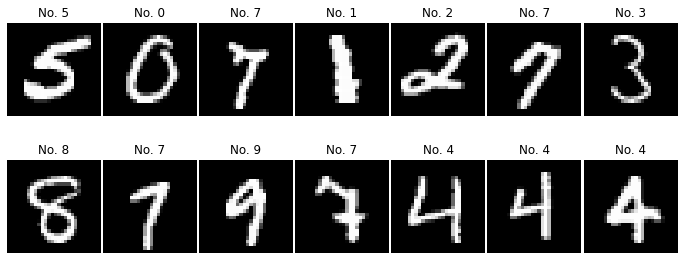

In [7]:
print(f'Dataset selected : {my_scenario.dataset.name}')

# display 14 random images from the training set
import matplotlib.pyplot as plt
import numpy as np

x_train = my_scenario.dataset.x_train
y_train = my_scenario.dataset.y_train
rand_14 = np.random.randint(0, x_train.shape[0],14)
sample_images = x_train[rand_14]
sample_labels = y_train[rand_14]

# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_images[image_index].reshape(28,28), cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

### Note on validation and test sets

The dataset module provides separated train and test sets (referred to as global train set and global test set).
The global train set is then further split into a global train set and a global validation set.
In the multi-partner learning computations, the global validation set is used for early stopping and the global test set is used for performance evaluation.
The global train set is partitioned amongst partner (according to the scenario configuration) to populate the partner's local datasets.
Then for each partner, the local dataset can be split into separated train, validation and test sets, depending on the dataset configuration. Currently, the local validation and test set are not used, but they are available for further developments of multi-partner learning and contributivity measurement approaches.


In [8]:
print(f'Train samples : {len(my_scenario.dataset.x_train)}')
print(f'Test samples : {len(my_scenario.dataset.x_test)}')
print(f'Validatin samples : {len(my_scenario.dataset.x_val)}')

Train samples : 54000
Test samples : 10000
Validatin samples : 6000


## Model(s)

Therefore, you neither define the model that will be used. The dataset holds a methods which generate the model, as in the multipartner learning some approachs need to generate models several times. Every dataset came with it own model, that you can change by generating your own dataset.  

In [ ]:
model_example = my_scenario.dataset.generate_new_model()
model_example.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

### Training parameters 

There are several parameters influencing how the collaborative and distributed learning is done over the datasets of the partners. The firsts we will be interested in are `epoch_count`, `minibatch_count`, and `gradient_updates_per_pass_count`. The following schema introduces well these definitions : 


![Schema epochs mini-batches gradient updates](../../img/epoch_minibatch_gradientupdates.png)

After a training iteration over a given mini-batch, the individual models of each partner are aggregated in a way that can be parametrized by `aggregation_weighting`. Here, we use the default value `'uniform'`. See the [documentation](../../doc/documentation.md) for more details.

The `multi_partner_learning_approach` parameter defines the multi-partner learning approach, among the approcach implemented. The full list and description of the different approachs usable are descripted in the documentation, here we will use the default value `'fedavg'`, which stands for federated averaging. Its functionnement is described by the following schema:
![Schema fedavg](../../img/collaborative_rounds_fedavg.png)

For tutorial purposes, we will change the default `epoch_count`, `minibatch_count` values to 10 epochs, and 3 minibatches. 

In [9]:
my_scenario = Scenario(partners_count = 3,
                            amounts_per_partner = [0.2, 0.5, 0.3],
                            epoch_count = 10,
                            minibatch_count = 3
                            )

2020-09-17 12:34:11.473 | DEBUG    | subtest.scenario:__init__:88 - Dataset selected: mnist
2020-09-17 12:34:11.475 | DEBUG    | subtest.scenario:__init__:101 - Computation use the full dataset for scenario #1
2020-09-17 12:34:11.476 | INFO     | subtest.scenario:__init__:262 - ### Description of data scenario configured:
2020-09-17 12:34:11.476 | INFO     | subtest.scenario:__init__:263 -    Number of partners defined: 3
2020-09-17 12:34:11.477 | INFO     | subtest.scenario:__init__:264 -    Data distribution scenario chosen: random
2020-09-17 12:34:11.478 | INFO     | subtest.scenario:__init__:265 -    Multi-partner learning approach: fedavg
2020-09-17 12:34:11.479 | INFO     | subtest.scenario:__init__:266 -    Weighting option: uniform
2020-09-17 12:34:11.480 | INFO     | subtest.scenario:__init__:267 -    Iterations parameters: 10 epochs > 3 mini-batches > 8 gradient updates per pass
2020-09-17 12:34:11.481 | INFO     | subtest.scenario:__init__:273 - ### Data loaded: mnist
2020-0

## 2 - Run your scenario

The actual training phase of our federated learning example ! 

As Subtest relies on tensorflow, you can use GPU, if you have one avaible. 

In [10]:
from subtest.utils import init_gpu_config
init_gpu_config()

my_scenario.run()

2020-09-17 12:34:15.949 | INFO     | subtest.scenario:split_data:521 - ### Splitting data among partners:
2020-09-17 12:34:15.950 | INFO     | subtest.scenario:split_data:522 -    Simple split performed.
2020-09-17 12:34:15.951 | INFO     | subtest.scenario:split_data:523 -    Nb of samples split amongst partners: 43740
2020-09-17 12:34:15.952 | INFO     | subtest.scenario:split_data:525 -    Partner #0: 8748 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-17 12:34:15.953 | INFO     | subtest.scenario:split_data:525 -    Partner #1: 21870 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-17 12:34:15.954 | INFO     | subtest.scenario:split_data:525 -    Partner #2: 13122 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-17 12:34:16.158 | DEBUG    | subtest.scenario:compute_batch_sizes:569 -    Compute batch sizes, partner #0: 364
2020-09-17 12:34:16.159 | DEBUG    | subtest.scenario:compute_batch_sizes:569 -    Compute batch sizes, partner #1: 911
2020-09-17

0

## Explore the results

A scenario can be exported to dataframe format, to see the different parameters, and some results. 

In [12]:
df_results = my_scenario.to_dataframe()
df_results.head()

,aggregation_weighting,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,mpl_test_score,multi_partner_learning_approach,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count
0,uniform,"[0.2, 0.5, 0.3]",mnist,10.0,"[0.2, 0.5, 0.3]",8.0,1.0,96.601551,3.0,10.0,0.9876,fedavg,43740.0,3.0,random,scenario_1_repeat_1_2020-09-17_12h34_79b,"3 [0.2, 0.5, 0.3]",10000.0,54000.0


#### Our score :

In [14]:
print("Approach used :", df_results.multi_partner_learning_approach[0])
print("Model accuracy :", df_results.mpl_test_score[0])

Approach used : fedavg
Model accuracy : 0.9876000285148621


## Extract model 

We can extract our model and save it for later

In [ ]:
model = my_scenario.mpl.get_model()

In [ ]:
x_test = my_scenario.dataset.x_test
y_test = my_scenario.dataset.y_test
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/step


[0.05563341381018981, 0.9811000227928162]

# That's it !

Now you can explore our other tutorials for a better snapshot of what can be done with our library!